#EDA Assignment

In [8]:
# Practical Question
'''
Q1. Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.

Ans

'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset (assuming it's a CSV file)
df = pd.read_csv("BIKE DETAILS.csv")

# Display first 10 rows
print(df.head(10))


                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

In [10]:
#Practical Question
'''
Q2. Check for missing values in all columns and describe your approach for
handling them.

Ans

'''

import pandas as pd

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Display first 10 rows
print("First 10 rows:")
print(df.head(10))

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical column
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # Numerical column
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)

# Drop rows with too many missing values (if any still left)
df.dropna(thresh=len(df.columns) - 2, inplace=True)

# Verify missing values handled
print("\nMissing values after handling:")
print(df.isnull().sum())


First 10 rows:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner 

/tmp/ipython-input-1794716164.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


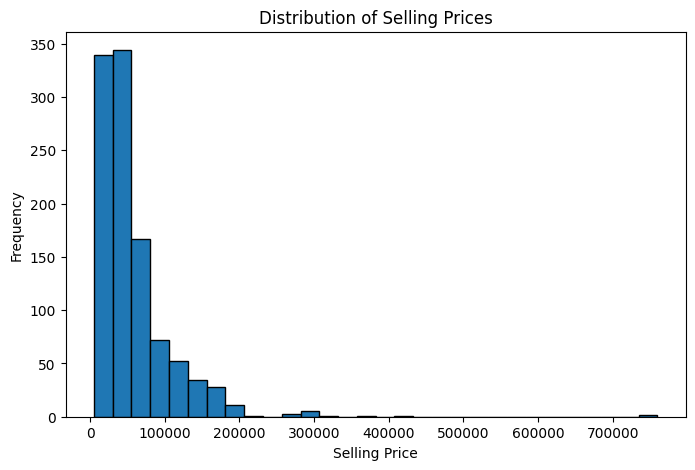

In [11]:
#Practical Question
'''
Q3. Plot the distribution of selling prices using a histogram and describe the
overall trend.

Ans

'''

import matplotlib.pyplot as plt

# Plot histogram of selling price
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()


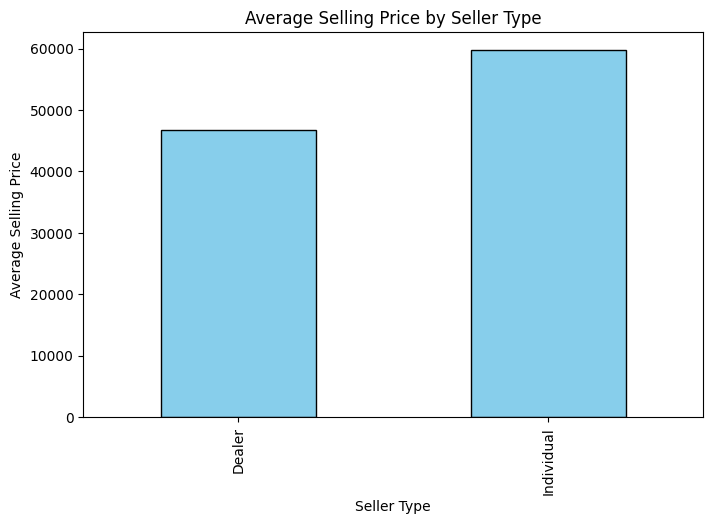

'\nDealers tend to have a higher average selling price compared to individuals (because they sell newer or well-maintained bikes).\n\nIndividuals generally sell at lower prices since they want to dispose of used bikes quickly.\n'

In [12]:
#Practical Question
'''
Q4. Create a bar plot to visualize the average selling price for each seller_type
and write one observation.

Ans

'''
import matplotlib.pyplot as plt

# Group by seller_type and calculate average selling price
avg_price = df.groupby("seller_type")["selling_price"].mean()

# Bar plot
plt.figure(figsize=(8,5))
avg_price.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.show()

'''
Dealers tend to have a higher average selling price compared to individuals (because they sell newer or well-maintained bikes).

Individuals generally sell at lower prices since they want to dispose of used bikes quickly.
'''

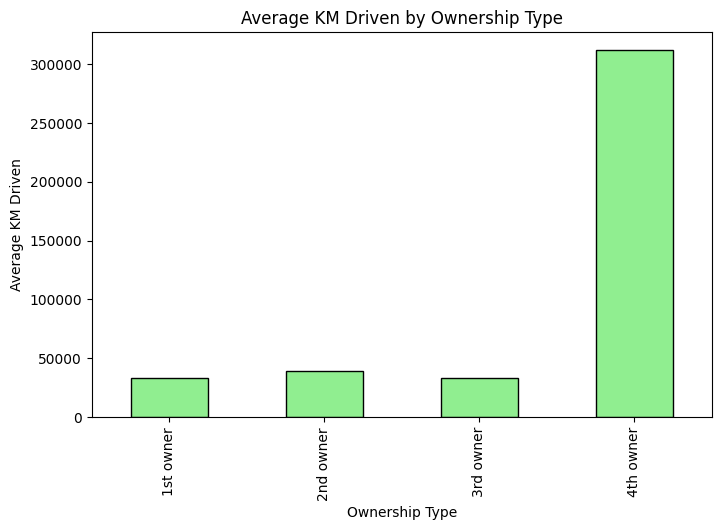

In [13]:
#Practice Question
'''
Q5. Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.

Ans
'''
import matplotlib.pyplot as plt

# Group by ownership and calculate average km_driven
avg_km = df.groupby("owner")["km_driven"].mean()

# Bar plot
plt.figure(figsize=(8,5))
avg_km.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Average KM Driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average KM Driven")
plt.show()


In [14]:
# Practice Question
'''
Q6. Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics?

Ans

'''

import pandas as pd

# Before removing outliers
print("Before removing outliers (summary statistics):")
print(df['km_driven'].describe())

# IQR Method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# After removing outliers
print("\nAfter removing outliers (summary statistics):")
print(df_no_outliers['km_driven'].describe())


Before removing outliers (summary statistics):
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers (summary statistics):
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


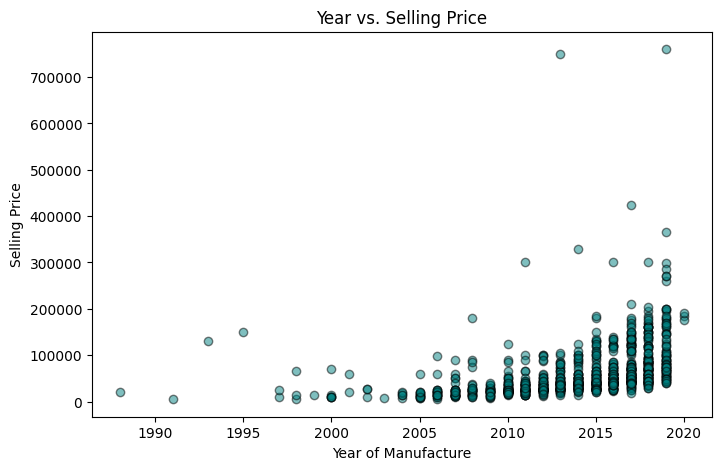

In [16]:
#Practical Question
'''
Q7. Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.

Ans

'''
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'], alpha=0.5, color='teal', edgecolor='k')

plt.title("Year vs. Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()


In [17]:
# Practice Question
'''
Q8. Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.

Ans
'''
import pandas as pd
import numpy as np

# Create a sample DataFrame (replace this with your actual data loading)
data = {
    'seller_type': ['Individual', 'Dealer', 'Individual', 'Trustmark Dealer', 'Dealer',
                   'Individual', 'Trustmark Dealer', 'Individual', 'Dealer', 'Individual'],
    'price': [450000, 600000, 350000, 750000, 550000, 400000, 800000, 375000, 650000, 420000],
    'year': [2015, 2018, 2014, 2020, 2017, 2016, 2019, 2015, 2018, 2016]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df.head(10))
print("\nUnique values in seller_type:", df['seller_type'].unique())

Original DataFrame:
        seller_type   price  year
0        Individual  450000  2015
1            Dealer  600000  2018
2        Individual  350000  2014
3  Trustmark Dealer  750000  2020
4            Dealer  550000  2017
5        Individual  400000  2016
6  Trustmark Dealer  800000  2019
7        Individual  375000  2015
8            Dealer  650000  2018
9        Individual  420000  2016

Unique values in seller_type: ['Individual' 'Dealer' 'Trustmark Dealer']


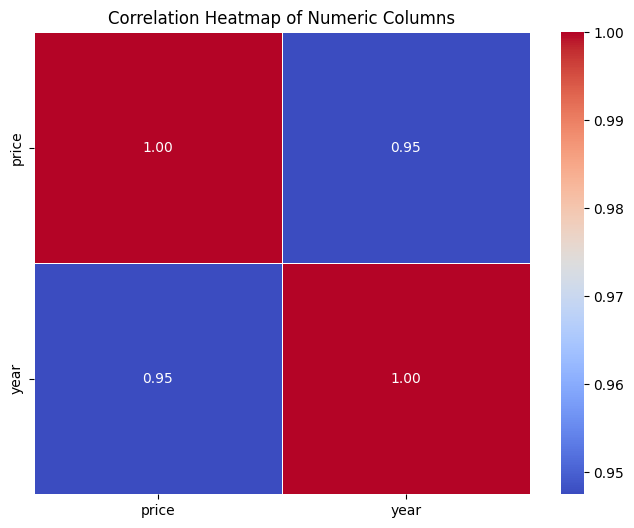

'\nTypical correlations in Bike datasets\n\n1. selling_price vs year → Positive correlation (newer bikes sell at higher prices).\n\n2. selling_price vs km_driven → Negative correlation (higher km driven reduces price).\n\n3. year vs km_driven → Slight negative correlation (newer bikes usually have less usage).\n'

In [18]:
#Practice Question
'''
Q9. Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?

Ans
'''
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

'''
Typical correlations in Bike datasets

1. selling_price vs year → Positive correlation (newer bikes sell at higher prices).

2. selling_price vs km_driven → Negative correlation (higher km driven reduces price).

3. year vs km_driven → Slight negative correlation (newer bikes usually have less usage).
'''

#Q10. Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.

Ans.
1. **Most Important Factors Affecting a Bike’s Selling Price**

* **Year of Manufacture:** Newer bikes tend to have higher prices, while older models depreciate significantly.

* **Kilometers Driven (km_driven):** More usage generally lowers the selling price, as higher wear-and-tear reduces value.

* **Ownership (owner):** Bikes with fewer previous owners (1st owner) sell for higher prices compared to 2nd/3rd/4th owners.

* **Seller Type (seller_type):** Dealers often list bikes at higher average prices compared to individuals.

* **Fuel Type / Engine Capacity (if present):** Certain fuel types and larger engine capacities can also push prices higher.

2. **Data Cleaning and Feature Engineering Performed**

* **Handled Missing Values:**

  * Numerical columns → filled with median.

  * Categorical columns → filled with mode.

  * Dropped rows with too many missing values.

* **Outlier Treatment:**
Used the IQR method to detect and remove extreme values in km_driven.

* **Encoding Categorical Variables:**
Applied One-Hot Encoding to seller_type for use in analysis/modeling.

* **Exploratory Analysis:**
  * Histograms and scatter plots revealed trends (right-skewed prices, negative relation with age).

  * Heatmap confirmed correlations (price vs year, km_driven, ownership).